<a href="https://colab.research.google.com/github/antbartash/shoes_classification/blob/main/shoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries, data and creating a dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl

np.random.seed(42)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
batch_size = 32
img_size = (240, 240)

# create a training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/shoes_classification/data/train/',
     shuffle=True, batch_size=batch_size, image_size=img_size,
    validation_split=0.2, subset='training', seed=42
)

# create a validation dataset
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/shoes_classification/data/train/', 
    shuffle=True, batch_size=batch_size, image_size=img_size,
    validation_split=0.2, subset='validation', seed=42
)

# create a test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/shoes_classification/data/test/', 
    shuffle=True, batch_size=batch_size, image_size=img_size
)

Found 711 files belonging to 3 classes.
Using 569 files for training.
Found 711 files belonging to 3 classes.
Using 142 files for validation.
Found 114 files belonging to 3 classes.


In [ ]:
train_dataset.class_names

['adidas', 'converse', 'nike']

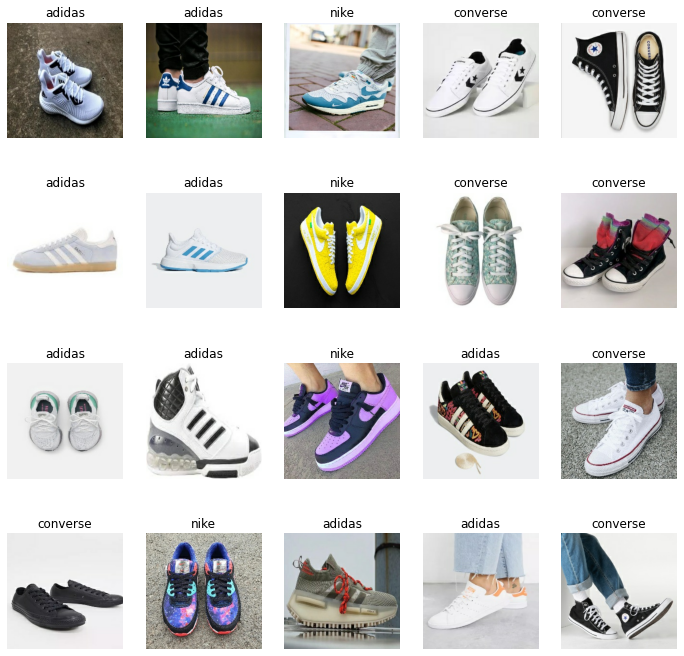

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis('off')

In [ ]:
def preprocess(image, labels):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, labels

train_dataset = train_dataset.map(preprocess).batch(batch_size).prefetch(1)
valid_dataset = valid_dataset.map(preprocess).batch(batch_size).prefetch(1)
test_dataset = test_dataset.map(preprocess).batch(batch_size).prefetch(1)

In [ ]:
base_model = keras.applications.xception.Xception(weights='imagenet',
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(3, activation='softmax')(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)